In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('delaney-processed.csv')
print(list(data))
data

['Compound ID', 'ESOL predicted log solubility in mols per litre', 'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area', 'measured log solubility in mols per litre', 'smiles']


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [3]:
data = pd.read_csv('delaney-processed.csv')[['Compound ID','smiles','measured log solubility in mols per litre']]
data.head()

,Compound ID,smiles,measured log solubility in mols per litre
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,Thiophene,c1ccsc1,-1.33


Change SMILES to mol inside dataframe

,Compound ID,smiles,measured log solubility in mols per litre,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,
4,Thiophene,c1ccsc1,-1.33,

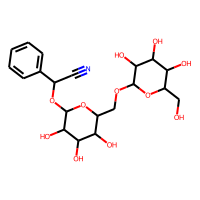
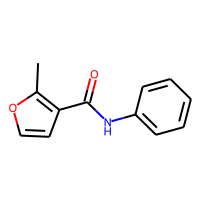
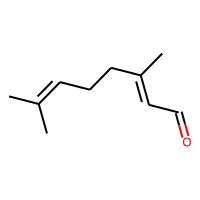
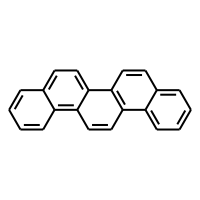
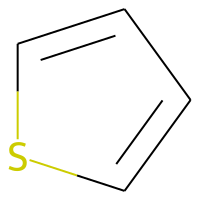

In [7]:
PandasTools.AddMoleculeColumnToFrame(data,'smiles', 'Molecule')
data.head()

Let's remove the SMILES (not needed anymore)

,Compound ID,measured log solubility in mols per litre,Molecule
0,Amigdalin,-0.77,
1,Fenfuram,-3.30,
2,citral,-2.06,
3,Picene,-7.87,
4,Thiophene,-1.33,

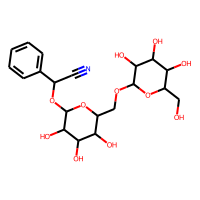
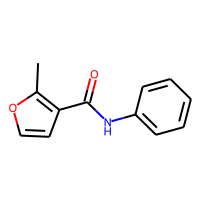
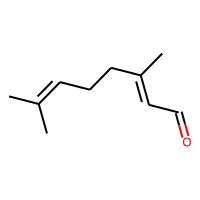
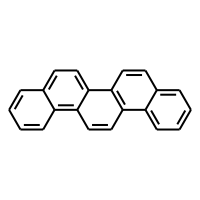
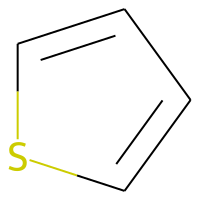

In [12]:
data = data.drop(columns='smiles')
data.head()

,Compound ID,solubility,Molecule
0,Amigdalin,-0.77,
1,Fenfuram,-3.30,
2,citral,-2.06,
3,Picene,-7.87,
4,Thiophene,-1.33,

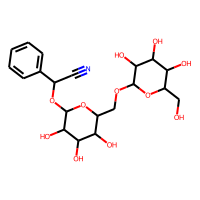
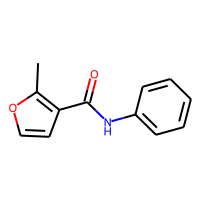
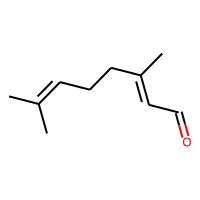
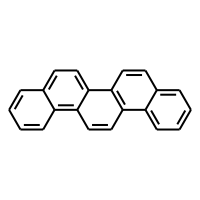
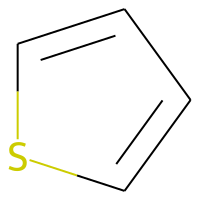

In [18]:
data = data.rename(columns={'measured log solubility in mols per litre':'solubility'})
data.head()

,Compound ID,solubility,Molecule
603,"2,2',3,3',4,4',5,5',6,6'-PCB",-11.600,
718,Coronene,-9.332,
297,"2,2',3,3',4,4',5,5'-PCB",-9.160,
60,"2,2',3,3',5,5',6,6'-PCB",-9.150,
676,Benzo[ghi]perylene,-9.018,

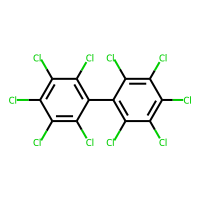
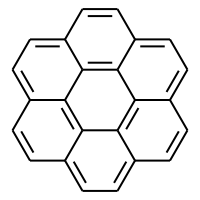
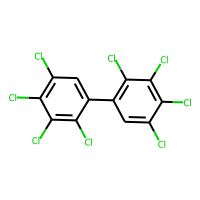
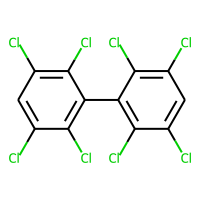
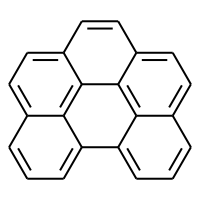

In [19]:
data.sort_values(by=['solubility']).head()

,Compound ID,solubility,Molecule
605,Acetamide,1.580,
146,Methanol,1.570,
201,Methyl hydrazine,1.340,
1064,vamidothion,1.144,
679,Glycerol,1.120,

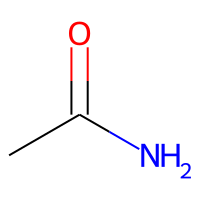
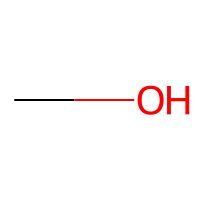
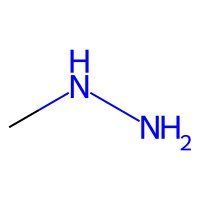
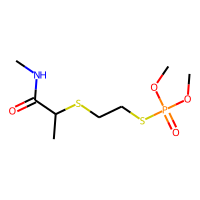
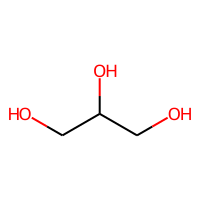

In [21]:
data.sort_values(by=['solubility'], ascending=False).head()

In [24]:
data['solubility'].max()

1.58

,Compound ID,solubility,Molecule
605,Acetamide,1.580,
146,Methanol,1.570,
201,Methyl hydrazine,1.340,
1064,vamidothion,1.144,
679,Glycerol,1.120,
687,"N,N-Dimethylacetamide",1.110,
186,Pyridazine,1.100,
365,Pyrimidine,1.100,
983,Ethanol,1.100,
276,Sorbitol,1.090,

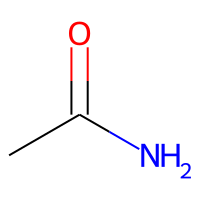
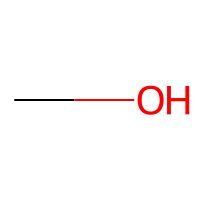
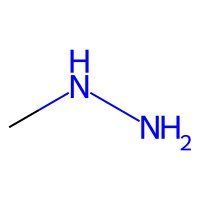
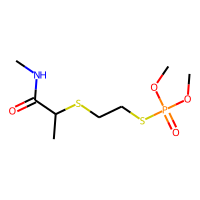
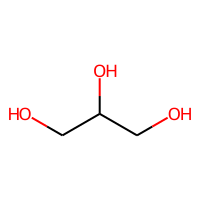
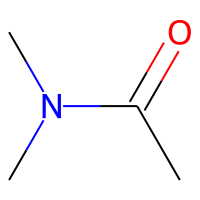
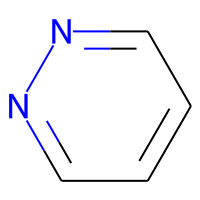
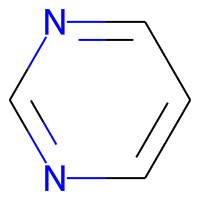
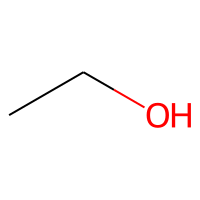
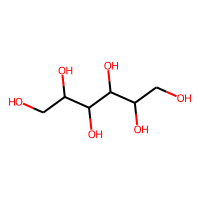
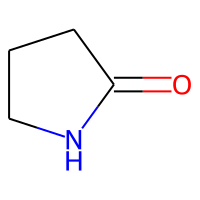
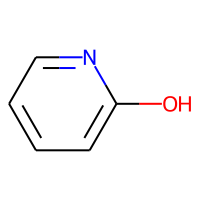
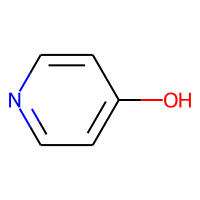

In [28]:
highly_sol = data.loc[data['solubility'] >= 1.0]
highly_sol.sort_values(by=['solubility'], ascending=False)

,Compound ID,solubility,Molecule,mw
0,Amigdalin,-0.770,,457.432
1,Fenfuram,-3.300,,201.225
2,citral,-2.060,,152.237
3,Picene,-7.870,,278.354
4,Thiophene,-1.330,,84.143
...,...,...,...,...
1123,halothane,-1.710,,197.381
1124,Oxamyl,0.106,,219.266
1125,Thiometon,-3.091,,246.359
1126,2-Methylbutane,-3.180,,72.151

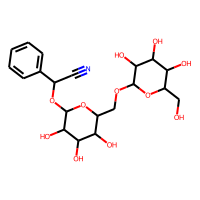
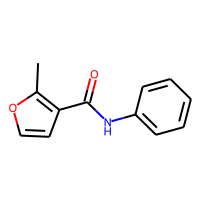
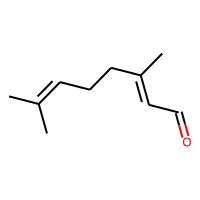
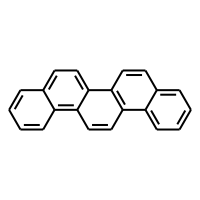
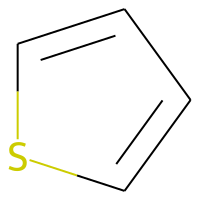
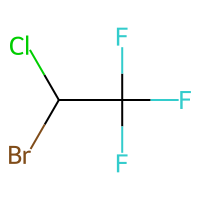
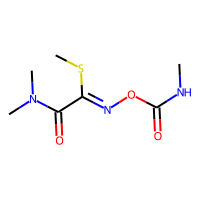
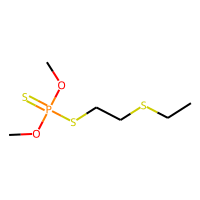
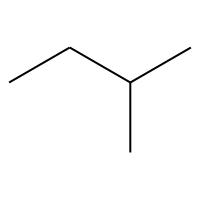
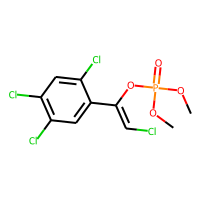

In [30]:
data['mw'] = [Descriptors.MolWt(mol) for mol in data['Molecule']]
data